<a href="https://colab.research.google.com/github/spatiallysaying/ML_AND_BEYOND/blob/master/ML_SVM_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from numpy import array
import numpy as np
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [0]:
from sklearn import svm

In [0]:
df=pd.read_csv('/content/drive/My Drive/ML_Group/data/credit.csv')
df.head()

,BUSAGE,DAYSDELQ,DEFAULT
0,87,2,N
1,89,2,N
2,90,2,N
3,90,2,N
4,101,2,N


In [0]:
X=df[['BUSAGE', 'DAYSDELQ']]
X

,BUSAGE,DAYSDELQ
0,87,2
1,89,2
2,90,2
3,90,2
4,101,2
...,...,...
95,207,70
96,229,70
97,65,72
98,37,76


In [0]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df.DEFAULT)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
len(y)

100

In [0]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1).fit(X, y)

In [0]:
# create a mesh to plot in
x_min, x_max = X.BUSAGE.min() - 1, X.BUSAGE.max() + 1
y_min, y_max = X.DAYSDELQ.min() - 1,  X.DAYSDELQ.max() + 1

h = (x_max / x_min)/100 # Step Size

x1=np.arange(x_min, x_max,h)
y1=np.arange(y_min, y_max,h)
xx, yy = np.meshgrid(x1,y1)

In [0]:
len(y)

100

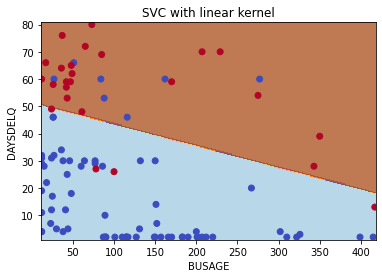

In [0]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X.BUSAGE, X.DAYSDELQ, c=y, cmap=plt.cm.coolwarm)
plt.xlabel('BUSAGE')
plt.ylabel('DAYSDELQ')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

# **https://chrisalbon.com/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/**

In [0]:
# Import packages to visualize the classifer
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

# Import packages to do the classifying
import numpy as np
from sklearn.svm import SVC


In [0]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

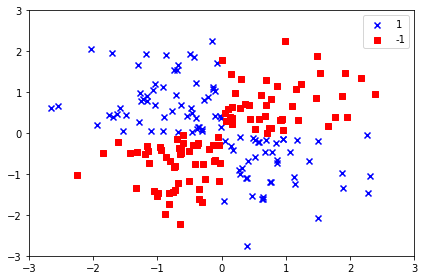

In [30]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


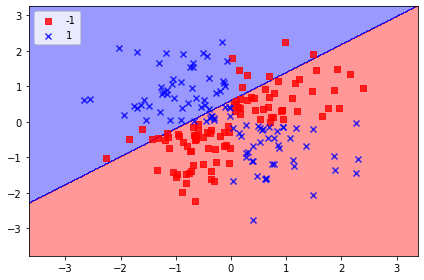

In [0]:
# Create a SVC classifier using a linear kernel
svm = SVC(kernel='linear', C=1, random_state=0)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


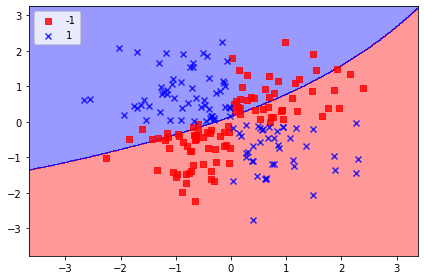

In [31]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


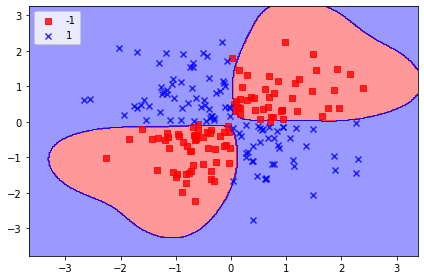

In [32]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=1, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


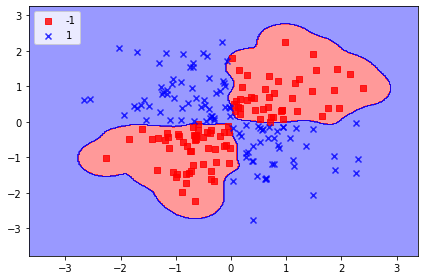

In [33]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=10, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


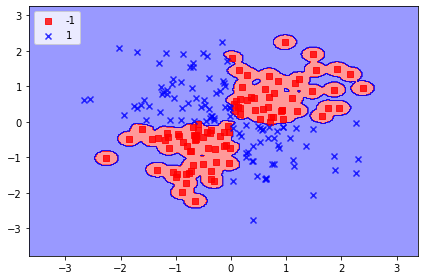

In [34]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=100, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


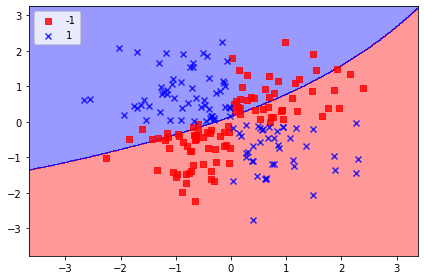

In [35]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


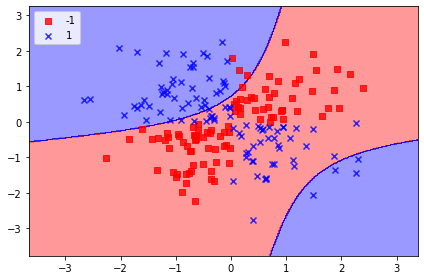

In [0]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=10)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


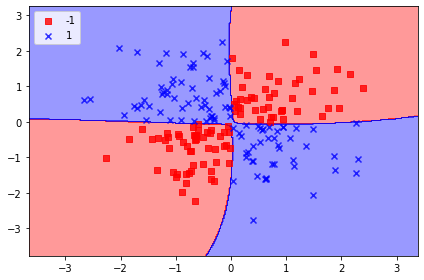

In [38]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=0.1, C=1000)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


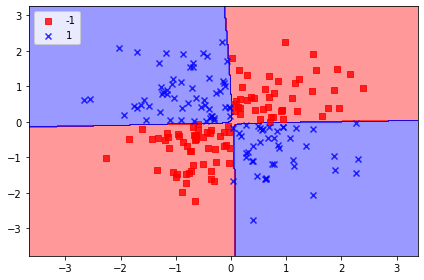

In [0]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=10000)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# *SVM Hyperparameter Tuning *

**GridSearchCV**

In [0]:
from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(X_xor, y_xor) 

In [37]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 


{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


**RandomizedSearchCV**

In [39]:
from sklearn.model_selection import RandomizedSearchCV

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf']} 

randmozed_clf = RandomizedSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
randmozed_clf.fit(X_xor, y_xor) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] kernel=rbf, gamma=0.0001, C=100 .................................
[CV] ..... kernel=rbf, gamma=0.0001, C=100, score=0.425, total=   0.0s
[CV] kernel=rbf, gamma=0.0001, C=100 .................................
[CV] ..... kernel=rbf, gamma=0.0001, C=100, score=0.425, total=   0.0s
[CV] kernel=rbf, gamma=0.0001, C=100 .................................
[CV] ..... kernel=rbf, gamma=0.0001, C=100, score=0.450, total=   0.0s
[CV] kernel=rbf, gamma=0.0001, C=100 .................................
[CV] ..... kernel=rbf, gamma=0.0001, C=100, score=0.425, total=   0.0s
[CV] kernel=rbf, gamma=0.0001, C=100 .................................
[CV] ..... kernel=rbf, gamma=0.0001, C=100, score=0.600, total=   0.0s
[CV] kernel=rbf, gamma=0.01, C=10 ....................................
[CV] ........ kernel=rbf, gamma=0.01, C=10, score=0.575, total=   0.0s
[CV] kernel=rbf, gamma=0.01, C=10 ....................................
[CV] ........ ke

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=3)

In [40]:
# print best parameter after tuning 
print(randmozed_clf.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(randmozed_clf.best_estimator_) 

{'kernel': 'rbf', 'gamma': 1, 'C': 1}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


# **https://www.kaggle.com/dkim1992/grid-search-vs-random-search**

# **https://www.kaggle.com/nishan192/mnist-digit-recognition-using-svm**